In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load data
school = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/school_census.csv",index_col=0)
# Remove schools with no classes and private schools
school = school[(school["n_classes"] > 0) & (school["admin_type"] != 4.0)]
census = pd.read_csv("/Users/feliphlvo/Documents/Minerva/Capstone/data/local/access_df.csv", index_col=0)

# Convert to geodataframe
import geopandas as gpd
import shapely.wkt as wkt
census = gpd.GeoDataFrame(census, geometry = census["geometry"].apply(wkt.loads), crs = "EPSG:5641")

In [3]:
# rename school variables
school.rename({"ideb_filled":"C"}, axis=1, inplace=True)

# creating capacity variable
school["capacity"] = school["n_classes"]*30

In [4]:
census.head()

3sfca_n_classes  e2sfca_n_classes state  n_households  \
sector_id                                                                
170025105000002         0.002974          0.002974    TO         115.0   
170030105000001         0.037295          0.035309    TO         286.0   
170030105000002         0.037050          0.035869    TO         294.0   
170030105000003         0.007200          0.006643    TO         102.0   
170030105000004         0.030753          0.038818    TO          56.0   

                 n_people  avg_monthly_earnings  n_people_15to17_white  \
sector_id                                                                
170025105000002     300.0                648.06                    1.0   
170030105000001    1123.0                927.45                   10.0   
170030105000002    1101.0                478.33                   11.0   
170030105000003     385.0                453.32                    3.0   
170030105000004     245.0                368.55                    3.0   

                 n_people_15to17_black  n_people_15to17_asian  \
sector_id                                                       
170025105000002                    0.0                    0.0   
170030105000001                    2.0                    3.0   
170030105000002                    0.0                    1.0   
170030105000003                    1.0                    0.0   
170030105000004                    0.0                    0.0   

                 n_people_15to17_parda  ...      density  zone_rural  \
sector_id                               ...                            
170025105000002                   10.0  ...     0.690384           1   
170030105000001                   59.0  ...   203.080486           0   
170030105000002                   46.0  ...  2351.281021           0   
170030105000003                   17.0  ...     1.712922           1   
170030105000004                   11.0  ...   749.086039           1   

                 zone_urban  region_Midwest  region_North  region_Northeast  \
sector_id                                                                     
170025105000002           0               0             1                 0   
170030105000001           1               0             1                 0   
170030105000002           1               0             1                 0   
170030105000003           0               0             1                 0   
170030105000004           0               0             1                 0   

                 region_South  region_Southeast  fpl_above  fpl_below  
sector_id                                                              
170025105000002             0                 0          1          0  
170030105000001             0                 0          1          0  
170030105000002             0                 0          1          0  
170030105000003             0                 0          1          0  
170030105000004             0                 0          0          1  

[5 rows x 58 columns]

(array([1.000e+00, 2.000e+00, 2.000e+00, 6.000e+00, 8.000e+00, 1.500e+01,
        1.500e+01, 7.600e+01, 8.100e+01, 1.030e+02, 3.780e+02, 2.670e+02,
        5.020e+02, 3.730e+02, 1.474e+03, 6.890e+02, 7.750e+02, 1.779e+03,
        9.120e+02, 1.009e+03, 1.388e+03, 2.306e+03, 9.970e+02, 9.730e+02,
        9.180e+02, 1.869e+03, 6.770e+02, 5.630e+02, 7.830e+02, 2.960e+02,
        2.160e+02, 1.880e+02, 2.610e+02, 9.400e+01, 8.600e+01, 1.270e+02,
        4.400e+01, 4.900e+01, 3.700e+01, 6.800e+01, 2.400e+01, 1.800e+01,
        2.700e+01, 9.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00]),
 array([1.3  , 1.428, 1.556, 1.684, 1.812, 1.94 , 2.068, 2.196, 2.324,
        2.452, 2.58 , 2.708, 2.836, 2.964, 3.092, 3.22 , 3.348, 3.476,
        3.604, 3.732, 3.86 , 3.988, 4.116, 4.244, 4.372, 4.5  , 4.628,
        4.756, 4.884, 5.012, 5.14 , 5.268, 5.396, 5.524, 5.652, 5.78 ,
        5.908, 6.036, 6.164, 6.292, 6.42 , 6.548, 6.676, 6.804, 6.932,
        7.06 , 7.188,

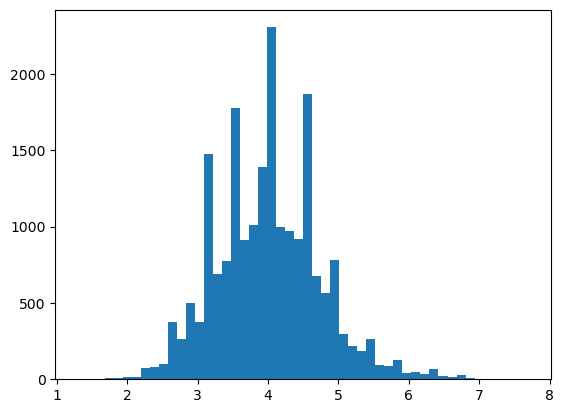

In [6]:
# hist of school quality
plt.hist(school["C"], bins=50)

## Summary Statistics

In [7]:
census.head()

3sfca_n_classes  e2sfca_n_classes state  n_households  \
sector_id                                                                
170025105000002         0.002974          0.002974    TO         115.0   
170030105000001         0.037295          0.035309    TO         286.0   
170030105000002         0.037050          0.035869    TO         294.0   
170030105000003         0.007200          0.006643    TO         102.0   
170030105000004         0.030753          0.038818    TO          56.0   

                 n_people  avg_monthly_earnings  n_people_15to17_white  \
sector_id                                                                
170025105000002     300.0                648.06                    1.0   
170030105000001    1123.0                927.45                   10.0   
170030105000002    1101.0                478.33                   11.0   
170030105000003     385.0                453.32                    3.0   
170030105000004     245.0                368.55                    3.0   

                 n_people_15to17_black  n_people_15to17_asian  \
sector_id                                                       
170025105000002                    0.0                    0.0   
170030105000001                    2.0                    3.0   
170030105000002                    0.0                    1.0   
170030105000003                    1.0                    0.0   
170030105000004                    0.0                    0.0   

                 n_people_15to17_parda  ...      density  zone_rural  \
sector_id                               ...                            
170025105000002                   10.0  ...     0.690384           1   
170030105000001                   59.0  ...   203.080486           0   
170030105000002                   46.0  ...  2351.281021           0   
170030105000003                   17.0  ...     1.712922           1   
170030105000004                   11.0  ...   749.086039           1   

                 zone_urban  region_Midwest  region_North  region_Northeast  \
sector_id                                                                     
170025105000002           0               0             1                 0   
170030105000001           1               0             1                 0   
170030105000002           1               0             1                 0   
170030105000003           0               0             1                 0   
170030105000004           0               0             1                 0   

                 region_South  region_Southeast  fpl_above  fpl_below  
sector_id                                                              
170025105000002             0                 0          1          0  
170030105000001             0                 0          1          0  
170030105000002             0                 0          1          0  
170030105000003             0                 0          1          0  
170030105000004             0                 0          0          1  

[5 rows x 58 columns]

In [8]:
# Dictionary of variable names and their "print" names
print_name = {
    "n_teachers":"Number of teachers",
    "n_students":"Number of students",
    "n_classes":"Number of classes",
    "A": "Accessibility",
    "Q": "Quality",
    "H": "Quality-adjusted Accessibility",
    "avg_monthly_earnings": "Monthly Income (R$)",
    "density": "Density (people/km^2)",
    "pct_white": "% White",}

### Census Tracts

In [9]:
# Making a dataframe containing summary statistics

columns = {
    "n_households":"Number of households",
    "n_people":"Number of people", 
    "avg_monthly_earnings":"Average Monthly Earnings",
    "n_people_15to17": "Number of people aged 15 to 17",
    "pct_black": "Percentage black",
    "pct_white": "Percentage white",
    "pct_indigenous": "Percentage indigenous",
    "pct_pardos": "Percentage pardos",
    "pct_asian": "Percentage asian",
    "pct_men": "Percentage male"}

metrics = {
     "mean": "Mean",
    "std": "Std.Dev",
}


df_summary = census[columns.keys()].describe().transpose()[metrics.keys()]

df_summary.rename(index=columns, columns=metrics, inplace=True)
df_summary



Mean      Std.Dev
Number of households             189.712075    99.753575
Number of people                 628.164596   344.438378
Average Monthly Earnings        1230.670235  1353.528070
Number of people aged 15 to 17    34.276330    22.542783
Percentage black                   0.067868     0.093036
Percentage white                   0.474209     0.274176
Percentage indigenous              0.007208     0.073547
Percentage pardos                  0.440494     0.253670
Percentage asian                   0.010207     0.030482
Percentage male                    0.506578     0.127939

In [10]:
df_summary.to_latex("summary.tex")

/var/folders/v6/m0s_jr6d723809xzpzrvx_340000gn/T/ipykernel_80503/237270451.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_summary.to_latex("summary.tex")


In [11]:
columns = {
    "mod_3sfca_n_classes": "A",
    "Q_n_classes": "Q",
    "Q_adj_3sfca": "H",}

metrics = {
     "mean": "Mean",
    "std": "Std.Dev",
}


df_summary = census[columns.values()].describe().transpose()[metrics.keys()]

df_summary.rename(index=columns, columns=metrics, inplace=True)
df_summary

Mean   Std.Dev
A  0.688919  0.609726
Q  0.402976  0.057715
H  0.278384  0.215616

In [12]:
# Count how many rows have geometry equal to school["geometry"][0]

census[census["geometry"] == 'GEOMETRYCOLLECTION EMPTY'].count()

3sfca_n_classes                0
e2sfca_n_classes               0
state                          0
n_households                   0
n_people                       0
avg_monthly_earnings           0
n_people_15to17_white          0
n_people_15to17_black          0
n_people_15to17_asian          0
n_people_15to17_parda          0
n_people_15to17_indigenous     0
n_people_15                    0
n_people_16                    0
n_people_17                    0
n_people_15_men                0
n_people_16_men                0
n_people_17_men                0
n_people_15_women              0
n_people_16_women              0
n_people_17_women              0
n_people_15to17dem             0
n_people_15to17_alternative    0
state_id                       0
state_abbrev                   0
city_id                        0
city_name                      0
district_id                    0
district_name                  0
subdistrict_id                 0
subdistrict_name               0
neighborho

In [13]:
# Average number of students per classroom
print("Average number of students per classroom: ", school["n_students"].sum() / school["n_classes"].sum())

Average number of students per classroom:  30.79513771063335


### Schools

In [14]:
# Define capacity as 35 times the number of classrooms
school["capacity"] = 35*school["n_classes"]

In [15]:
columns = {
    "n_teachers":"Number of teachers",
    "n_students":"Number of students",
    "capacity":"Estimated capacity",
    "C":"Quality"}

metrics = {
     "mean": "Mean",
    "std": "Std.Dev",
}


school_summary = school[columns.keys()].describe().transpose()[metrics.keys()]

school_summary.rename(index=columns, columns=metrics, inplace=True)
school_summary

Mean     Std.Dev
Number of teachers    8.404181   13.446329
Number of students  323.161171  289.465090
Estimated capacity  367.286585  289.079604
Quality               4.010585    0.746204

In [16]:
school.columns

Index(['region_name', 'region_id', 'state_name', 'state_abbrev', 'state_id',
       'city_name', 'city_id', 'mesoregion_name', 'mesoregion_id',
       'microregion_name', 'microregion_id', 'sector_id', 'school_id',
       'school_name', 'admin_type', 'location_type', 'address',
       'address_number', 'address_complement', 'neighborhood', 'zip_code',
       'QT_MAT_INF', 'QT_MAT_FUND', 'n_students', 'n_teachers', 'n_classes',
       'sigla_uf', 'geometry', 'ideb_school', 'saeb_school',
       'output_indicator_school', 'ideb_city', 'saeb_city',
       'output_indicator_city', 'ideb_state', 'saeb_state',
       'output_indicator_state', 'C', 'capacity'],
      dtype='object')

In [17]:
school.describe()

region_id      state_id       city_id  mesoregion_id  \
count  20500.000000  20500.000000  2.050000e+04   20500.000000   
mean       2.881659     32.231366  3.239461e+06    3228.484878   
std        1.071267      9.872547  9.897297e+05     988.012521   
min        1.000000     11.000000  1.100015e+06    1101.000000   
25%        2.000000     26.000000  2.604106e+06    2602.000000   
50%        3.000000     33.000000  3.301702e+06    3304.000000   
75%        4.000000     41.000000  4.101804e+06    4101.000000   
max        5.000000     53.000000  5.300108e+06    5301.000000   

       microregion_id     sector_id     school_id    admin_type  \
count    20500.000000  2.050000e+04  2.050000e+04  20500.000000   
mean     32252.556146  3.239461e+08  3.236884e+07      1.979707   
std       9875.911680  9.897298e+07  9.871519e+06      0.194259   
min      11001.000000  1.100015e+08  1.100026e+07      1.000000   
25%      26005.000000  2.604106e+08  2.604306e+07      2.000000   
50%      33009.000000  3.301702e+08  3.303018e+07      2.000000   
75%      41002.250000  4.101804e+08  4.100937e+07      2.000000   
max      53001.000000  5.300108e+08  5.306818e+07      3.000000   

       location_type      zip_code  ...   saeb_school  \
count   20500.000000  2.050000e+04  ...  12007.000000   
mean        1.142537  5.202654e+07  ...      4.659987   
std         0.349608  2.762400e+07  ...      0.673165   
min         1.000000  1.107000e+06  ...      1.951648   
25%         1.000000  2.846000e+07  ...      4.217778   
50%         1.000000  5.749500e+07  ...      4.641431   
75%         1.000000  7.580038e+07  ...      5.051461   
max         2.000000  9.999000e+07  ...      7.774514   

       output_indicator_school     ideb_city     saeb_city  \
count             18382.000000  19505.000000  19505.000000   
mean                  0.863346      3.973043      4.592582   
std                   0.104174      0.612192      0.470498   
min                   0.153759      1.700000      2.236053   
25%                   0.801534      3.500000      4.303865   
50%                   0.883158      4.000000      4.632232   
75%                   0.946439      4.500000      4.900008   
max                   1.000000      6.500000      6.981192   

       output_indicator_city    ideb_state    saeb_state  \
count           20430.000000  20500.000000  20500.000000   
mean                0.860514      3.953376      4.563758   
std                 0.080553      0.419259      0.300263   
min                 0.426798      3.200000      3.930724   
25%                 0.813431      3.600000      4.348177   
50%                 0.868636      4.000000      4.708547   
75%                 0.921999      4.300000      4.763683   
max                 1.000000      4.700000      5.046128   

       output_indicator_state             C      capacity  
count            20500.000000  20500.000000  20500.000000  
mean                 0.861822      4.010585    367.286585  
std                  0.055279      0.746204    289.079604  
min                  0.766159      1.300000     35.000000  
25%                  0.809010      3.500000    175.000000  
50%                  0.862818      4.000000    315.000000  
75%                  0.910656      4.500000    455.000000  
max                  0.947212      7.700000   5740.000000  

[8 rows x 26 columns]

In [18]:
# count if geomtry is 'GEOMETRYCOLLECTION EMPTY'
school[school["geometry"] == 'GEOMETRYCOLLECTION EMPTY'].count()

region_name                2023
region_id                  2023
state_name                 2023
state_abbrev               2023
state_id                   2023
city_name                  2023
city_id                    2023
mesoregion_name            2023
mesoregion_id              2023
microregion_name           2023
microregion_id             2023
sector_id                  2023
school_id                  2023
school_name                2023
admin_type                 2023
location_type              2023
address                    2023
address_number             1663
address_complement          485
neighborhood               1781
zip_code                   2023
QT_MAT_INF                 2023
QT_MAT_FUND                2023
n_students                 2023
n_teachers                 2022
n_classes                  2023
sigla_uf                   1990
geometry                   2023
ideb_school                 823
saeb_school                 823
output_indicator_school    1445
ideb_cit

# Access and Quality by Subgroups

In [28]:


import math

def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def weighted_average(df, value, weight):
    """Computes the weighted average of a column in a dataframe"""
    val = df[value]
    wt = df[weight]
    return round((val * wt).sum() / wt.sum(), 3)
    
def subgroup_averages(df, subgroups):
    """Computes the weighted averages of a dataframe for a list of subgroups"""
    averages = {}
    for subgroup in subgroups:
        averages[subgroup] = [weighted_average(df, "A", subgroup), weighted_average(df, "Q", subgroup), weighted_average(df, "H", subgroup)]
    
    return pd.DataFrame(averages, index=["Supply", "Average Quality", "Quality-Adjusted Supply"]) 


In [29]:
subgroup_averages(census, ["fpl_below", "fpl_above"])

fpl_below  fpl_above
Supply                       0.405      0.678
Average Quality              0.285      0.390
Quality-Adjusted Supply      0.151      0.276

In [30]:
subgroup_averages(census, ["zone_urban", "zone_rural"])


zone_urban  zone_rural
Supply                        0.727       0.372
Average Quality               0.399       0.304
Quality-Adjusted Supply       0.295       0.148

In [31]:
subgroup_averages(census, ["n_people_15to17_black", "n_people_15to17_white", "n_people_15to17_indigenous", "n_people_15to17_parda", "n_people_15to17_asian"])


n_people_15to17_black  n_people_15to17_white  \
Supply                                   0.631                  0.691   
Average Quality                          0.363                  0.398   
Quality-Adjusted Supply                  0.243                  0.285   

                         n_people_15to17_indigenous  n_people_15to17_parda  \
Supply                                        0.760                  0.646   
Average Quality                               0.259                  0.364   
Quality-Adjusted Supply                       0.270                  0.252   

                         n_people_15to17_asian  
Supply                                   0.663  
Average Quality                          0.375  
Quality-Adjusted Supply                  0.263

In [32]:
census["n_people_15to17_nonwhite"] = census["n_people_15to17"] - census["n_people_15to17_white"]
subgroup_averages(census, ["n_people_15to17_white","n_people_15to17_nonwhite"])

n_people_15to17_white  n_people_15to17_nonwhite
Supply                                   0.691                     0.646
Average Quality                          0.398                     0.363
Quality-Adjusted Supply                  0.285                     0.251

In [33]:
subgroup_averages(census, ["region_Northeast", "region_North", "region_South", "region_Southeast", "region_Midwest"])

region_Northeast  region_North  region_South  \
Supply                              0.513         0.731         0.717   
Average Quality                     0.338         0.273         0.393   
Quality-Adjusted Supply             0.195         0.254         0.295   

                         region_Southeast  region_Midwest  
Supply                              0.680           0.664  
Average Quality                     0.414           0.359  
Quality-Adjusted Supply             0.285           0.276

In [132]:
census["3sfca_n_classes"].mean()

0.019693251382959295

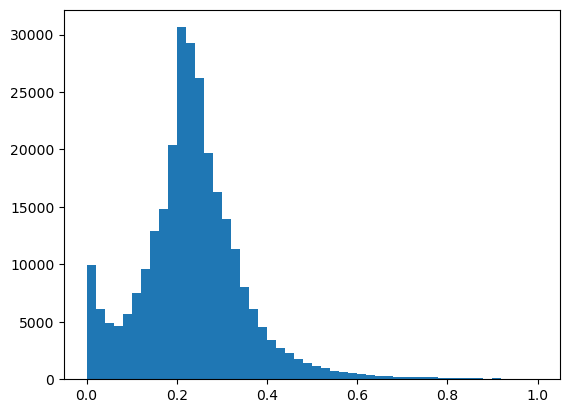

In [135]:
# histogram of q_adj_3sfca
plt.hist(census["H"], bins=50, range=(0, 1))
plt.show()

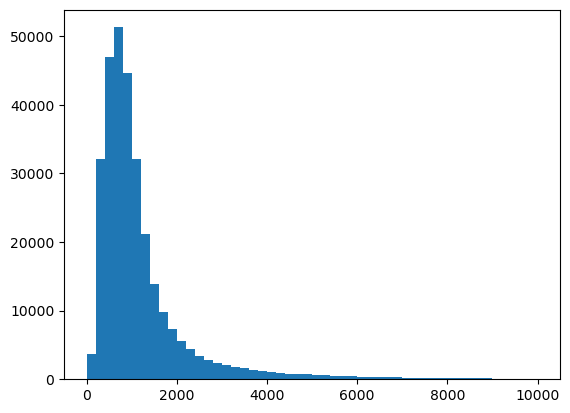

In [136]:
plt.hist(census["avg_monthly_earnings"], bins=50, range=(0, 10000))
plt.show()

# Regressions

In [137]:
census.isna().sum()

3sfca_n_classes                 19571
e2sfca_n_classes                19571
state                               0
n_households                      120
n_people                          120
avg_monthly_earnings              120
n_people_15to17_white               0
n_people_15to17_black               0
n_people_15to17_asian               0
n_people_15to17_parda               0
n_people_15to17_indigenous          0
n_people_15                         0
n_people_16                         0
n_people_17                         0
n_people_15_men                     0
n_people_16_men                     0
n_people_17_men                     0
n_people_15_women                   0
n_people_16_women                   0
n_people_17_women                   0
n_people_15to17dem                  0
n_people_15to17_alternative         0
state_id                           26
state_abbrev                       26
city_id                            26
city_name                          26
district_id 

In [138]:
census.columns

Index(['3sfca_n_classes', 'e2sfca_n_classes', 'state', 'n_households',
       'n_people', 'avg_monthly_earnings', 'n_people_15to17_white',
       'n_people_15to17_black', 'n_people_15to17_asian',
       'n_people_15to17_parda', 'n_people_15to17_indigenous', 'n_people_15',
       'n_people_16', 'n_people_17', 'n_people_15_men', 'n_people_16_men',
       'n_people_17_men', 'n_people_15_women', 'n_people_16_women',
       'n_people_17_women', 'n_people_15to17dem',
       'n_people_15to17_alternative', 'state_id', 'state_abbrev', 'city_id',
       'city_name', 'district_id', 'district_name', 'subdistrict_id',
       'subdistrict_name', 'neighborhood_name', 'neighborhood_id', 'geometry',
       'microregion_id', 'microregion_name', 'mesoregion_id',
       'mesoregion_name', 'n_people_15to17', 'A', 'Q', 'H', 'pct_black',
       'pct_white', 'pct_indigenous', 'pct_pardos', 'pct_asian', 'pct_men',
       'area', 'density', 'zone_rural', 'zone_urban', 'region_Midwest',
       'region_North', 'r

In [140]:
school[school["region_name"] == "Norte"]["C"].mean()

3.433078027764481

## Prepare Data

In [141]:
census.isna().sum()

3sfca_n_classes                 19571
e2sfca_n_classes                19571
state                               0
n_households                      120
n_people                          120
avg_monthly_earnings              120
n_people_15to17_white               0
n_people_15to17_black               0
n_people_15to17_asian               0
n_people_15to17_parda               0
n_people_15to17_indigenous          0
n_people_15                         0
n_people_16                         0
n_people_17                         0
n_people_15_men                     0
n_people_16_men                     0
n_people_17_men                     0
n_people_15_women                   0
n_people_16_women                   0
n_people_17_women                   0
n_people_15to17dem                  0
n_people_15to17_alternative         0
state_id                           26
state_abbrev                       26
city_id                            26
city_name                          26
district_id 

In [142]:
# Regression on accessibility metric
import statsmodels.api as sm
import statsmodels.formula.api as smf

# drop rows with missing access values
census_nona = census.dropna(subset=["Q", "avg_monthly_earnings"])
print(census_nona.isna().sum())
y = census_nona["H"]
X = census_nona[["pct_black", "pct_indigenous", "pct_pardos", "pct_asian", "pct_men", "avg_monthly_earnings", "zone_rural", "region_Midwest", "region_Northeast", "region_South", "region_North"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

3sfca_n_classes                     0
e2sfca_n_classes                    0
state                               0
n_households                        0
n_people                            0
avg_monthly_earnings                0
n_people_15to17_white               0
n_people_15to17_black               0
n_people_15to17_asian               0
n_people_15to17_parda               0
n_people_15to17_indigenous          0
n_people_15                         0
n_people_16                         0
n_people_17                         0
n_people_15_men                     0
n_people_16_men                     0
n_people_17_men                     0
n_people_15_women                   0
n_people_16_women                   0
n_people_17_women                   0
n_people_15to17dem                  0
n_people_15to17_alternative         0
state_id                            0
state_abbrev                        0
city_id                             0
city_name                           0
district_id 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2149.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:10:34   Log-Likelihood:                 87345.
No. Observations:              281880   AIC:                        -1.747e+05
Df Residuals:                  281868   BIC:                        -1.745e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2995      0.002    166.761      0.000       0.296       0.303
pct_black               -0.1695      0.004    -44.430      0.000      -0.177      -0.162
pct_indigenous           0.3798      0.007     56.983      0.000       0.367       0.393
pct_pardos              -0.0393      0.002    -20.449      0.000      -0.043      -0.036
pct_asian               -0.0053      0.011     -0.477      0.633      -0.027       0.017
pct_men                 -0.0083      0.003     -3.088      0.002      -0.014      -0.003
avg_monthly_earnings -7.517e-06    2.8e-07    -26.859      0.000   -8.07e-06   -6.97e-06
zone_rural              -0.0911      0.001   -101.015      0.000      -0.093      -0.089
region_Midwest           0.0289      0.001     20.990      0.000       0.026       0.032
region_Northeast        -0.0347      0.001    -36.885      0.000      -0.037      -0.033
region_South             0.0111      0.001     10.480      0.000       0.009       0.013
region_North             0.0365      0.002     22.765      0.000       0.033       0.040
==============================================================================
Omnibus:                  1009250.899   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1854741718785.768
Skew:                          72.127   Prob(JB):                         0.00
Kurtosis:                   12568.697   Cond. No.                     6.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Maps

In [182]:
import geopandas as gpd
from shapely import wkt
import contextily as cx
# Filter only São Paulo
census_sp = census[census["city_name"] == "São Paulo"]
#census_sp = gpd.GeoDataFrame(census_sp, geometry = census_sp["geometry"].apply(wkt.loads), crs = "EPSG:5641")

In [205]:
import geobr
# Download states from geobr
states_geom = geobr.read_state(code_state = "all", year = 2010, simplified = True)
states_geom.to_crs(epsg=5641, inplace=True)

# Download cities from geobr
cities_geom = geobr.read_municipality(code_muni = "all", year = 2010, simplified = True)
cities_geom.to_crs(epsg=5641, inplace=True)

sp_geom = cities_geom[cities_geom["name_muni"] == "São Paulo"]

In [208]:
cities_geom.head()

code_muni              name_muni  code_state abbrev_state  \
0  1100015.0  Alta Floresta D'oeste        11.0           RO   
1  1100023.0              Ariquemes        11.0           RO   
2  1100031.0                 Cabixi        11.0           RO   
3  1100049.0                 Cacoal        11.0           RO   
4  1100056.0             Cerejeiras        11.0           RO   

                                            geometry  
0  MULTIPOLYGON (((2858819.227 8675108.989, 28593...  
1  MULTIPOLYGON (((2759702.431 8913417.611, 27649...  
2  MULTIPOLYGON (((3050408.773 8514266.499, 30673...  
3  MULTIPOLYGON (((2949980.606 8763969.294, 29497...  
4  MULTIPOLYGON (((2951461.764 8524171.362, 29500...

In [185]:
sp_geom

code_muni  name_muni  code_state abbrev_state  \
562  3550308.0  São Paulo        35.0           SP   

                                              geometry  
562  POLYGON ((4602221.008 7341242.365, 4602523.168...

In [186]:
def plot(v, df = census_sp, ax=None, leg=True, swap_colors=False, edges = None):
    """
    Plot an outcome variable on a map using geopandas and contextily

    Parameters
    ----------
    v : str
        Name of the variable to plot
    df : geopandas.GeoDataFrame
        Dataframe with the variable to plot
    ax : matplotlib.Axes
        Axes to plot on
    leg : bool
        Whether to show the legend
    swap_colors : bool
        Whether to swap the color scheme
    edges : geopandas.GeoDataFrame
        Dataframe with the edges to plot
        
    """

    from matplotlib_scalebar.scalebar import ScaleBar

    base = df.plot(
        v,
        scheme = "quantiles",
        legend=leg,
        figsize=(10, 10),
        cmap="RdYlGn" if swap_colors else "OrRd",
        markersize=5,
        alpha=0.8,
        #edgecolor="black",
        legend_kwds={'loc': 'lower right', 'title': print_name[v]}
        #vmin=il_map[v].quantile(0.05),
        #vmax=il_map[v].quantile(0.95),
    )
    # basemap
    #gpd.GeoDataFrame(geometry=[df.geometry.unary_union], crs=df.crs).boundary.plot(ax=base)
    cx.add_basemap(base, crs=df.crs, source=cx.providers.CartoDB.VoyagerNoLabels)
    base.add_artist(ScaleBar(1))

    if edges is not None:
        edges.boundary.plot(ax=base, edgecolor="black", linewidth=1, color = None)
    plt.axis('off')
    #base.set_axis_off()
    


    plt.show()

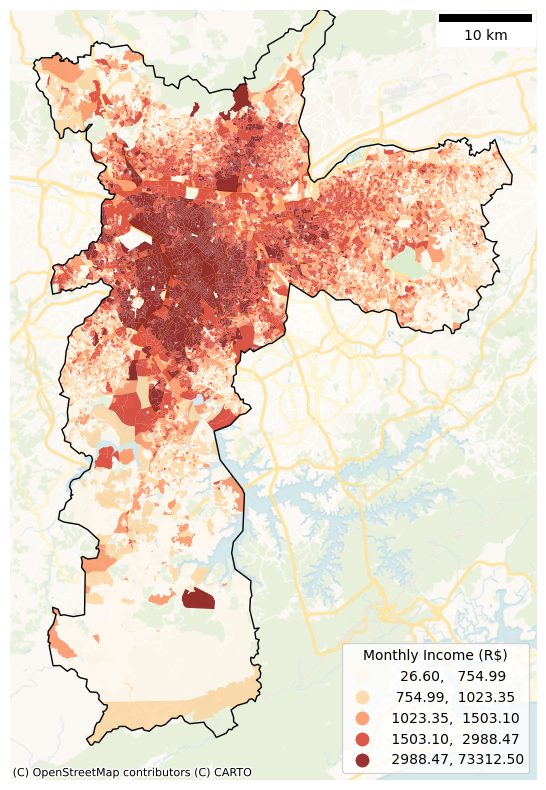

In [162]:
plot("avg_monthly_earnings", edges = sp_geom)

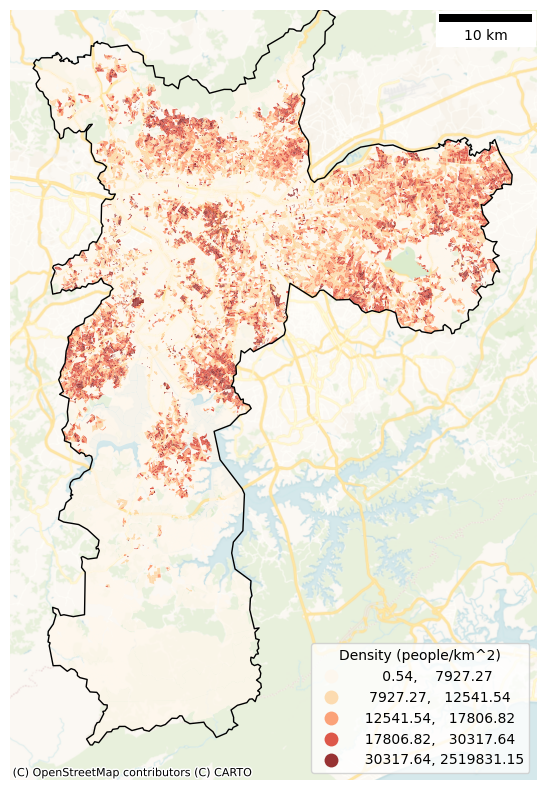

In [165]:
plot("density", edges = sp_geom)

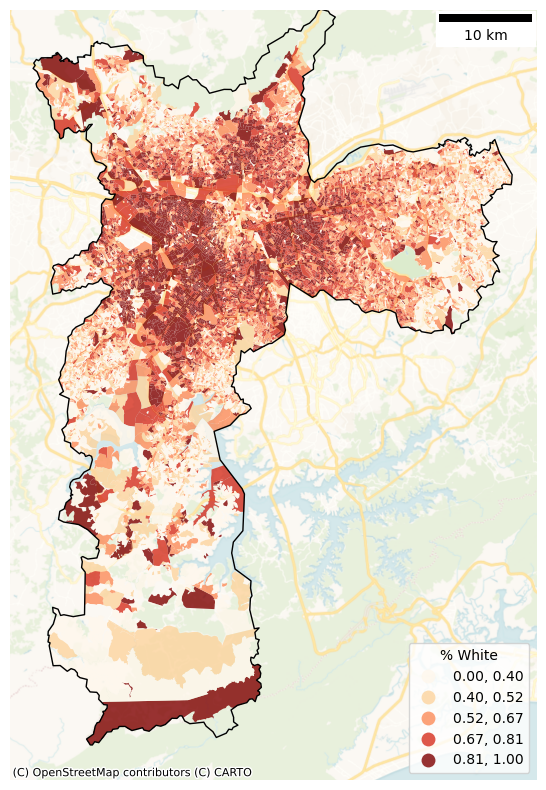

In [166]:
plot("pct_white", edges = sp_geom)

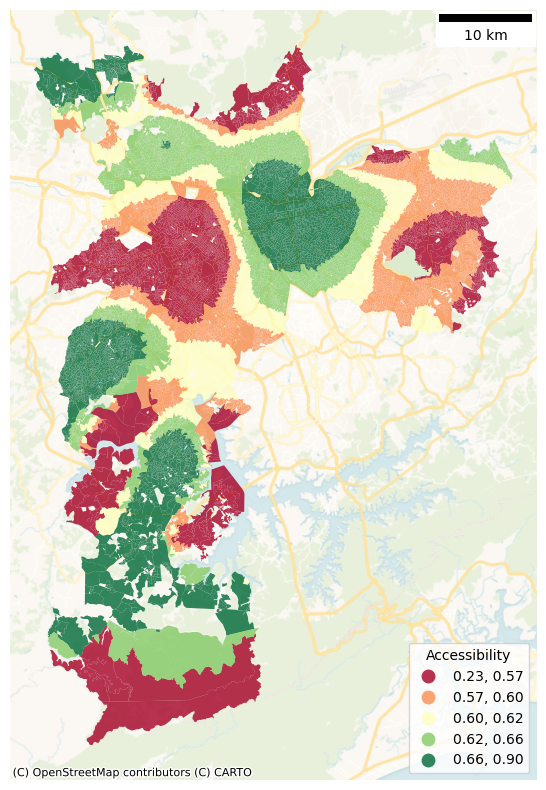

In [187]:
plot("A", swap_colors=True)

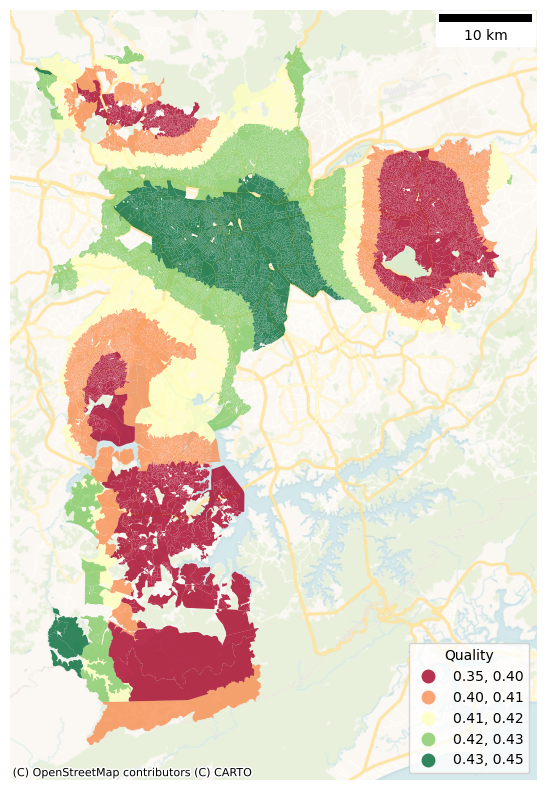

In [168]:
plot("Q", swap_colors=True)

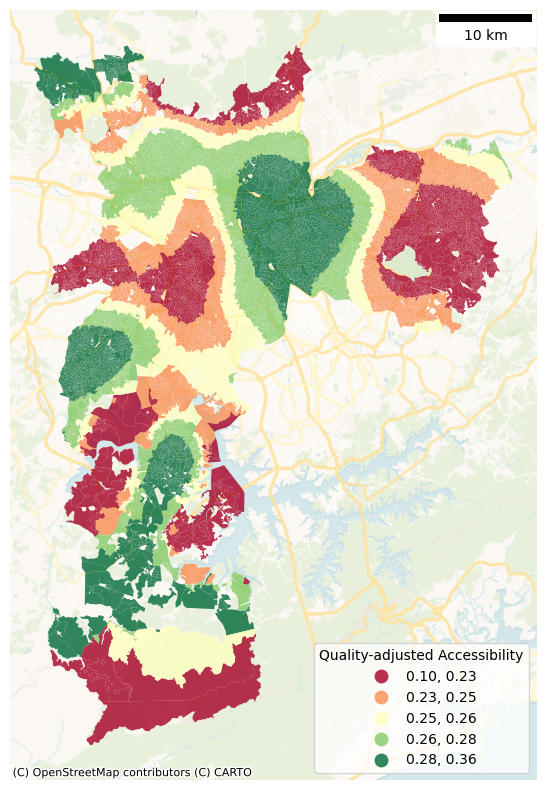

In [188]:
plot("H", swap_colors=True)

In [189]:
subgroup_averages(census_sp, ["fpl_above", "fpl_below"])

fpl_above  fpl_below
Supply                    0.617206   0.618197
Average Quality           0.414638   0.404710
Quality-Adjusted Supply   0.255805   0.250189

In [190]:
subgroup_averages(census_sp, ["n_people_15to17_black", "n_people_15to17_white", "n_people_15to17_indigenous", "n_people_15to17_parda", "n_people_15to17_asian"])

n_people_15to17_black  n_people_15to17_white  \
Supply                                0.623129               0.621113   
Average Quality                       0.408239               0.413314   
Quality-Adjusted Supply               0.254360               0.256698   

                         n_people_15to17_indigenous  n_people_15to17_parda  \
Supply                                     0.632215               0.624925   
Average Quality                            0.405604               0.407912   
Quality-Adjusted Supply                    0.255931               0.254881   

                         n_people_15to17_asian  
Supply                                0.616183  
Average Quality                       0.419955  
Quality-Adjusted Supply               0.258663

In [191]:
# Regression on accessibility metric
import statsmodels.api as sm
import statsmodels.formula.api as smf

# drop rows with missing access values
census_nona_sp = census_sp.dropna(subset=["Q", "avg_monthly_earnings"])

y = census_nona_sp["H"]
X = census_nona_sp[["pct_black", "pct_indigenous", "pct_pardos", "pct_asian", "pct_men", "avg_monthly_earnings", "zone_rural", "region_Midwest", "region_Northeast", "region_South", "region_North"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/feliphlvo/opt/anaconda3/envs/cap_env/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      H   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     78.31
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          1.89e-112
Time:                        13:19:40   Log-Likelihood:                 42042.
No. Observations:               18100   AIC:                        -8.407e+04
Df Residuals:                   18092   BIC:                        -8.401e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2651      0.001    315.839      0.000       0.263       0.267
pct_black               -0.0234      0.003     -8.978      0.000      -0.029      -0.018
pct_indigenous          -0.0102      0.011     -0.953      0.341      -0.031       0.011
pct_pardos              -0.0141      0.001    -14.012      0.000      -0.016      -0.012
pct_asian                0.0037      0.003      1.091      0.275      -0.003       0.010
pct_men                  0.0009      0.001      0.693      0.489      -0.002       0.003
avg_monthly_earnings -1.805e-06   8.31e-08    -21.710      0.000   -1.97e-06   -1.64e-06
zone_rural              -0.0069      0.001     -5.353      0.000      -0.009      -0.004
region_Midwest                0          0        nan        nan           0           0
region_Northeast              0          0        nan        nan           0           0
region_South                  0          0        nan        nan           0           0
region_North                  0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1480.590   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2113.997
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       4.005   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Map Brazil cities


In [192]:
def wavg(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [193]:
q_cities = census.groupby("city_id").apply(wavg, "Q", "n_people")
mod_3sfca_cities = census.groupby("city_id").apply(wavg, "A", "n_people")
q_adj_3sfca_cities = census.groupby("city_id").apply(wavg, "H", "n_people")


In [194]:
census_cities = pd.DataFrame(data=dict(s1=q_cities, s2=mod_3sfca_cities, s3 = q_adj_3sfca_cities))
census_cities.columns = ["Q", "A", "H"]
census_cities.head()

Q         A         H
city_id                                
1100015.0  0.337856  1.039004  0.470267
1100023.0  0.375436  0.881775  0.368646
1100031.0  0.315165  0.729335  0.291734
1100049.0  0.414153  0.898503  0.392657
1100056.0  0.455116  0.650657  0.299302

In [43]:
#  average of accessibility metrics for each city in Brazil, weighted by population of census tract
wm = lambda x: np.nansum(x*census.loc[x.index, "n_people"],axis=0)/((~np.isnan(x))*census.loc[x.index, "n_people"]).sum(axis=0)
census_cities = census.groupby(["city_id"]).agg({"n_people": "sum", "Q_n_classes": wm, "Q_adj_3sfca": wm, "mod_3sfca_n_classes": wm}).reset_index()

/var/folders/v6/m0s_jr6d723809xzpzrvx_340000gn/T/ipykernel_26818/117622489.py:3: RuntimeWarning: invalid value encountered in double_scalars
  wm = lambda x: np.nansum(x*census.loc[x.index, "n_people"],axis=0)/((~np.isnan(x))*census.loc[x.index, "n_people"]).sum(axis=0)


In [209]:
# merge with cities geometries
cities = cities_geom.merge(census_cities, left_on="code_muni", right_on="city_id")

# Set EPSG:5641 crs
cities = cities.to_crs(epsg=5641)



In [196]:
cities.head()

code_muni         name_muni  code_state abbrev_state  \
0  3500105.0        Adamantina        35.0           SP   
1  3500204.0            Adolfo        35.0           SP   
2  3500303.0             Aguaí        35.0           SP   
3  3500402.0    Águas Da Prata        35.0           SP   
4  3500501.0  Águas De Lindóia        35.0           SP   

                                            geometry         Q         A  \
0  POLYGON ((4099866.302 7568839.465, 4100205.806...  0.487643  0.834162   
1  POLYGON ((4254979.546 7584027.186, 4254941.272...  0.414300  1.286313   
2  POLYGON ((4553596.572 7505355.453, 4553794.115...  0.441056  0.673838   
3  POLYGON ((4584953.230 7512580.054, 4584815.723...  0.453809  0.453895   
4  POLYGON ((4595598.740 7451278.356, 4596361.616...  0.501261  0.816452   

          H  
0  0.410211  
1  0.533179  
2  0.303234  
3  0.207700  
4  0.409286

In [197]:
# Select only São Paulo
cities[cities["name_muni"] == "São Paulo"]


code_muni  name_muni  code_state abbrev_state  \
562  3550308.0  São Paulo        35.0           SP   

                                              geometry         Q         A  \
562  POLYGON ((4602221.008 7341242.365, 4602523.168...  0.413416  0.620455   

            H  
562  0.256436

In [198]:
states_geom.head()

code_state abbrev_state name_state  code_region name_region  \
0        11.0           RO   Rondônia          1.0       Norte   
1        12.0           AC       Acre          1.0       Norte   
2        13.0           AM   Amazonas          1.0       Norte   
3        14.0           RR    Roraima          1.0       Norte   
4        15.0           PA       Pará          1.0       Norte   

                                            geometry  
0  MULTIPOLYGON (((2738554.762 9115614.034, 27897...  
1  MULTIPOLYGON (((1642129.715 9187120.239, 17086...  
2  MULTIPOLYGON (((2293670.806 10224345.897, 2294...  
3  MULTIPOLYGON (((3086406.980 10582579.951, 3087...  
4  MULTIPOLYGON (((3670057.899 10285615.158, 3672...

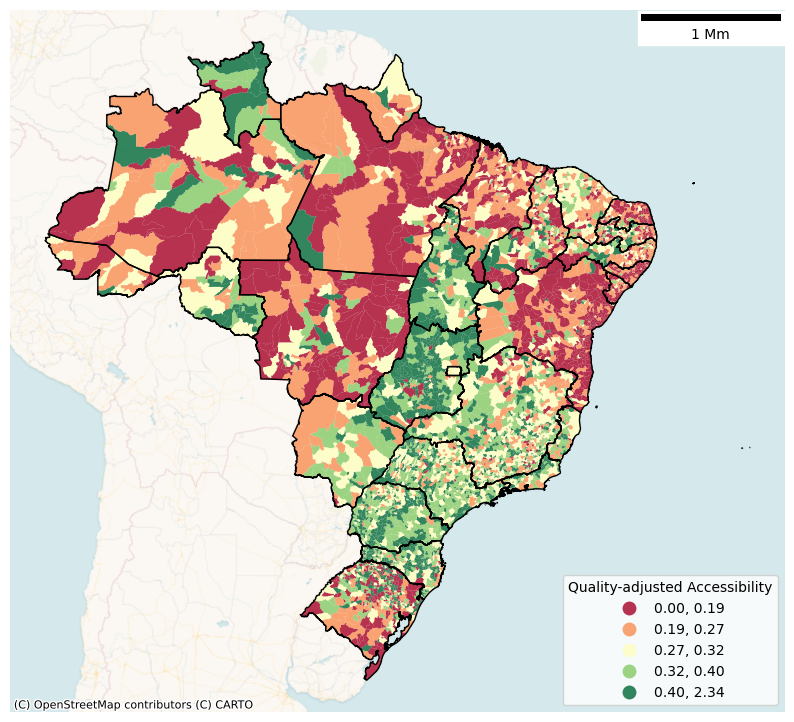

In [211]:
plot("H", df = cities, swap_colors=True, edges = states_geom)

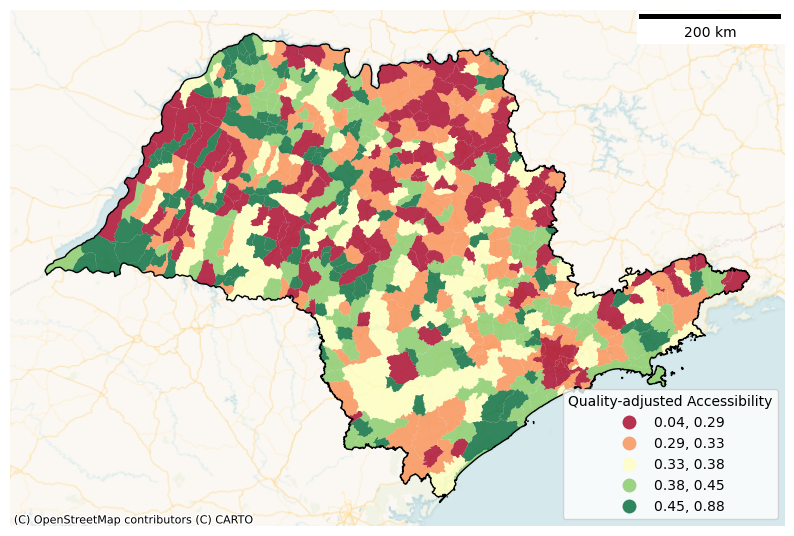

In [213]:
plot("H", df = cities[cities["abbrev_state"] == "SP"], swap_colors=True, edges=states_geom[states_geom["abbrev_state"] == "SP"])